# Analizando un conjunto de datos con Pandas

Analizaremos un archivo .xlsx el cual se extrajo de http://sinaiscap.salud.gob.mx:8080/DGIS/ el cual contiene los datos de los nacimientos por ocurrencia (es decir, los nacidos se registraron en el lugar de nacimiento) por año, desde el 2008 al 2024, en cada uno de los estados de la republica.

In [334]:
#Comenzamos importando las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [335]:
#Declaramos el url del cual vamos a extraer el archivo, lo leemos y con el contenido creamos un dataframe
url = 'https://raw.githubusercontent.com/KevinMundo11/Cuaderno-de-programacion/main/2008-2023_nacimientos_sexo_porentidad_oc.xlsx'
df = pd.read_excel(url, sheet_name='Concentrado')

## Manipulacion de datos

Para comenzar, veamos los primeros el tipo de dato que contiene cada columna.

In [336]:
print(df.dtypes) #Vemos los tipos de dato que contienen las columnas de nuestro data frame

Año                    int64
Entidad Federativa    object
Hombre                 int64
Mujer                  int64
NE                     int64
SE IGNORA              int64
Total                  int64
dtype: object


Notemos que la columna que lleva por nombre "Año" es de tipo entero, por lo que podemos utilizar el metodo .to_datatime para convertirlo a tipo fecha.
Para esto, veamos los primeros renglones de nuestro dataframe:

In [337]:
df.head(16)

,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
0,2024,Nacional,219605,212292,110,0,432007
1,2024,Aguascalientes,2408,2399,0,1,4807
2,2024,Baja California,6097,5962,2,0,12061
3,2024,Baja California Sur,1482,1458,0,0,2940
4,2024,Campeche,1484,1470,3,0,2957
5,2024,Coahuila,6294,6056,1,0,12351
6,2024,Colima,1332,1337,0,0,2669
7,2024,Chiapas,9963,9717,10,0,19690
8,2024,Chihuahua,6950,6541,3,0,13494
9,2024,CDMX,14658,14151,8,0,28817


Y aplicamos el metodo .to_datatime con el formato "%Y".

In [338]:
df['Año'] = pd.to_datetime(df.Año, format="%Y")

Visualizamos nuevamente para ver el formato de la fecha.

In [339]:
df.head(16)

,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
0,2024-01-01,Nacional,219605,212292,110,0,432007
1,2024-01-01,Aguascalientes,2408,2399,0,1,4807
2,2024-01-01,Baja California,6097,5962,2,0,12061
3,2024-01-01,Baja California Sur,1482,1458,0,0,2940
4,2024-01-01,Campeche,1484,1470,3,0,2957
5,2024-01-01,Coahuila,6294,6056,1,0,12351
6,2024-01-01,Colima,1332,1337,0,0,2669
7,2024-01-01,Chiapas,9963,9717,10,0,19690
8,2024-01-01,Chihuahua,6950,6541,3,0,13494
9,2024-01-01,CDMX,14658,14151,8,0,28817


Algo que podemos ver es que el renglon 1 no inicia con un estado de la republica, sino que tiene la palabra "Nacional" por lo que ese renglon no nos aporta informacion.
Algo que podemos inferir es que esto ocurre al inicio de cada año, los siguientes dos fracmentos de codigo nos muestra la informacion del renglon 33 y renglon 66, los cuales tienen la misma informacion en Entidad Federativa que el renglon 1.

In [340]:
df.iloc[33]

Año                   2023-01-01 00:00:00
Entidad Federativa               Nacional
Hombre                             774325
Mujer                              746334
NE                                    621
SE IGNORA                               0
Total                             1521280
Name: 33, dtype: object

In [341]:
df.iloc[66]

Año                   2022-01-01 00:00:00
Entidad Federativa               Nacional
Hombre                             826549
Mujer                              795243
NE                                   1120
SE IGNORA                               9
Total                             1622921
Name: 66, dtype: object

Dado que no nos aportan informacion que queremos, procedemos a quedarnos solamente con los que la Entidad Federativa no llevan por nombre Nacional y visualizamos para confirmar que ya no estan esos renglones.

In [342]:
df = df[df['Entidad Federativa']!= 'Nacional']
df.head(2)

,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
1,2024-01-01,Aguascalientes,2408,2399,0,1,4807
2,2024-01-01,Baja California,6097,5962,2,0,12061


La primera y segunda vez que visualizamos nuestro dataframe se puede ver que el Estado de Mexico lleva por nombre unicamente "Mexico" lo cual puede ser confuso a la hora de visualizar el comportamiento de los datos, asi que se usa el metodo .replace para que en todos los renglones donde hay una cadena con "Mexico" por entidad Federativa la cambie a "Estado de Mexico" y visualizamos para confirmar.

In [343]:
df['Entidad Federativa'] = df['Entidad Federativa'].replace({'México':'Estado de Mexico'})
df.head(15)

<ipython-input-343-1368a9feb9ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Entidad Federativa'] = df['Entidad Federativa'].replace({'México':'Estado de Mexico'})


,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
1,2024-01-01,Aguascalientes,2408,2399,0,1,4807
2,2024-01-01,Baja California,6097,5962,2,0,12061
3,2024-01-01,Baja California Sur,1482,1458,0,0,2940
4,2024-01-01,Campeche,1484,1470,3,0,2957
5,2024-01-01,Coahuila,6294,6056,1,0,12351
6,2024-01-01,Colima,1332,1337,0,0,2669
7,2024-01-01,Chiapas,9963,9717,10,0,19690
8,2024-01-01,Chihuahua,6950,6541,3,0,13494
9,2024-01-01,CDMX,14658,14151,8,0,28817
10,2024-01-01,Durango,3474,3349,2,0,6825


## Analisis de los datos

Tomaremos de base el año 2021 y veremos si durante a pandemia hubo mas o menos nacimientos que en el 2019 y 2020, ya que el confinamiento ponia a las parejas mayor tiempo juntas.
Tambien, al ser, actualmente, el Estado de Mexico, la Cuidad de Mexico y Jalisco las entidades con mayor poblacion veamos la media de cada uno a lo largo de estos 16 años.

In [344]:
df_2021 = df[df['Año'] == '2021-01-01']
df_2021_cdmx = df_2021[(df_2021['Entidad Federativa'] == 'CDMX')|(df_2021['Entidad Federativa'] == 'Estado de Mexico')|(df_2021['Entidad Federativa'] == 'Jalisco')]
df_2021_cdmx

,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
108,2021-01-01,CDMX,46492,44831,40,1,91364
113,2021-01-01,Jalisco,55492,52941,112,0,108545
114,2021-01-01,Estado de Mexico,68758,66502,74,3,135337


Podemos visualizar el hecho de que la Cuidad de Mexico, el Estado de Mexico y Jaisco sean las cuidades mas nacimientos en promedio a lo largo del lapso de tiempo 2008-2004 en la siguiente grafica:


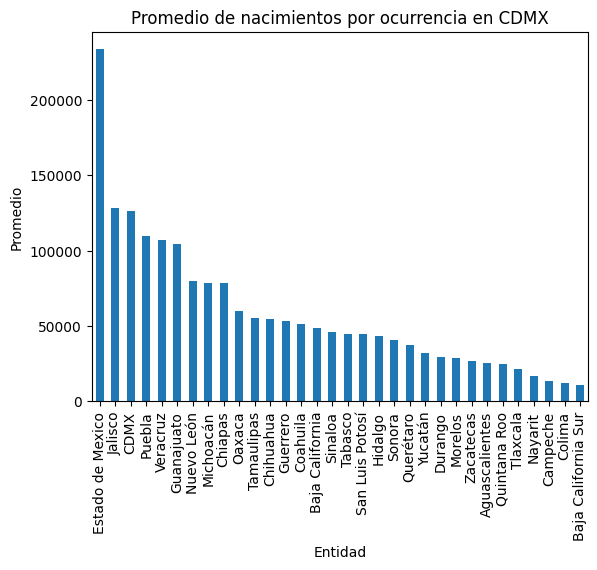

In [345]:
prom_entidad = df.groupby('Entidad Federativa')['Total'].mean().sort_values(ascending=False)
prom_entidad.plot(kind='bar', title='Promedio de nacimientos por ocurrencia en CDMX')
plt.xlabel('Entidad')
plt.ylabel('Promedio')
plt.show()

Actualmente sabemos que la poblacion del Estado de Mexico supera a la Ciudad de Mexico por casi el doble, pero la Cuidad de Mexico y Jalisco distan por poco menos de un millon. Con el dataframe mostrado anteriorente podemos ver que algo parecido sucede con los nacimientos entre la Cuidad de Mexico y el Estado de Mexico (pues esta a casi 40,000 nacimientos de diferencia), mientras que la Ciudad de Mexico y Jalisco en ese año tienen de diferencia cerca de 17,000 nacimientos.

Dado que la diferencia entre Cuidad de Mexico y Jalisco es mas pequeña, nos centraremos en ver sus diferencias en los dos años anteriores.

Como podemos ver, para el año 2019 solamente hubo una diferencia de alrededor de 10,000 nacimientos en favor de la Jalisco. Lo cual es interesante, ya que todos tenemos la idea de que la Cuidad de Mexico es la gran Metropolis y siempre esta en crecimiento.

In [346]:
df_2019 = df[df['Año'] == '2019-01-01']
df_2019_EmxJal = df_2019[(df_2019['Entidad Federativa'] == 'CDMX')|(df_2019['Entidad Federativa'] == 'Jalisco')]
df_2019_EmxJal

,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
174,2019-01-01,CDMX,58672,56985,72,0,115729
179,2019-01-01,Jalisco,64509,62242,90,0,126841


Para el año 2020 las cantidades se alejan por casi 18,000 nacimientos, nuevamente a favor de Jalisco.

In [347]:
df_2020 = df[df['Año'] == '2020-01-01']
df_2020_EmxJal = df_2020[(df_2020['Entidad Federativa'] == 'CDMX')|(df_2020['Entidad Federativa'] == 'Jalisco')]
df_2020_EmxJal

,Año,Entidad Federativa,Hombre,Mujer,NE,SE IGNORA,Total
141,2020-01-01,CDMX,52293,49913,26,34,102266
146,2020-01-01,Jalisco,61443,58497,35,34,120009


Con el analisis de esos tres años podemos ver que la diferencia entre ambos es ascendente, con cada año que transcurre la diferencia se hace mas marcada y siempre a favor de Jalisco.
Podemos observar tambien algo que es importante, conforme el año crece los nacimientos disminuyen.

Ahora, con la motivacion de que los nacimientos disminuyen veamos si eso ocurre retrocediendo mas en el tiempo, para esto nos ayudaremos de una grafica de barras donde el Eje x seran los años y el Eje y contiene el valor de la media de nacimientos de la Cuidad de Mexico.


En dicha grafica podemos ver que desde el año 2012 el promedio de nacimientos en esta entidad tiene tendencia decresciente hasta el año 2022.

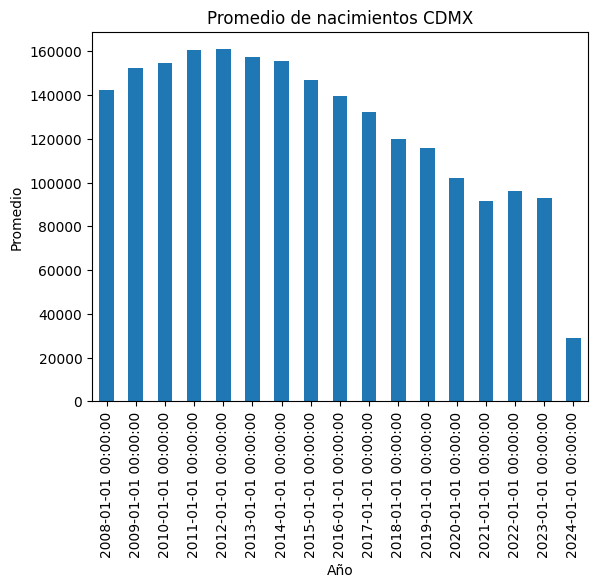

In [348]:
df_anio = df.groupby('Año')['Total'].mean()
df_anio_cdmx = df[df['Entidad Federativa'] == 'CDMX'].groupby('Año')['Total'].mean()


df_anio_cdmx.plot(kind='bar', title='Promedio de nacimientos CDMX')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()


Hacemos lo propio con Jalisco y podemos apreciar que tiene un comportamiento similar al grafico de la Ciudad de Mexico, salvo que los años 2021, 2022 y 2023 tiene promedios similares.

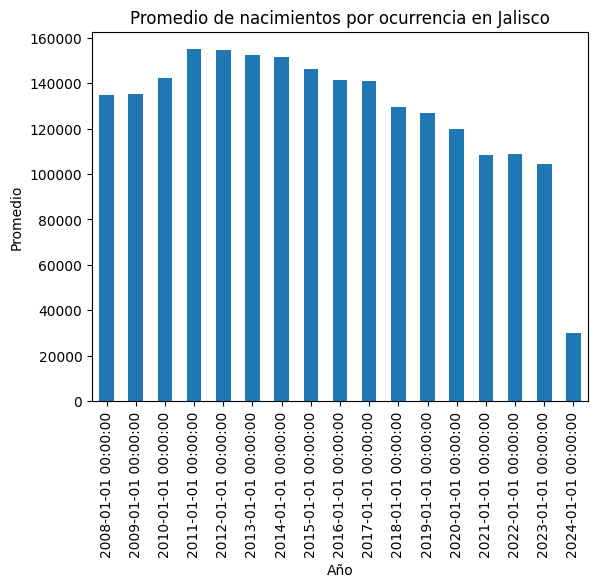

In [349]:
df_anio_jal = df[df['Entidad Federativa'] == 'Jalisco'].groupby('Año')['Total'].mean()


df_anio_jal.plot(kind='bar', title='Promedio de nacimientos por ocurrencia en Jalisco')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()


Comparemos en una misma grafica como se comportan los datos de las dos graficas anteriores.
Dado que los datos del 2024 aun no estan completos los quitaremos de nuestros datos y obtener una mejor grafica.

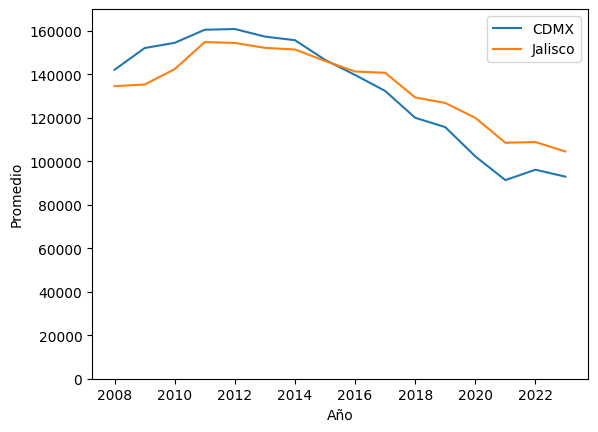

In [350]:
df_anio_cdmx = df_anio_cdmx[df_anio_cdmx.index != '2024-01-01']
df_anio_jal = df_anio_jal[df_anio_jal.index != '2024-01-01']
plt.plot(df_anio_cdmx)
plt.plot(df_anio_jal)
plt.legend(['CDMX', 'Jalisco'])
plt.ylim(0, 170000)
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()

Algo que podemos notar en que Jalisco no siempre tuvo mayor nuemros de nacimientos que la Cuidad de Mexico, sino que Jalisco empieza a dominar apartir del año 2016 hasta el 2023.

Tambien, podemos notar que en el año 2021 es donde se tiene un bajon mas pronunciado en el numero de nacimientos, contrario a lo que supoinia que iba a pasar.

Por ultimo, veamos que la tendencia negativa no se tiene solo en estos estados, sino que es a nivel nacional.
Lo podemos visualizar a continuacion.

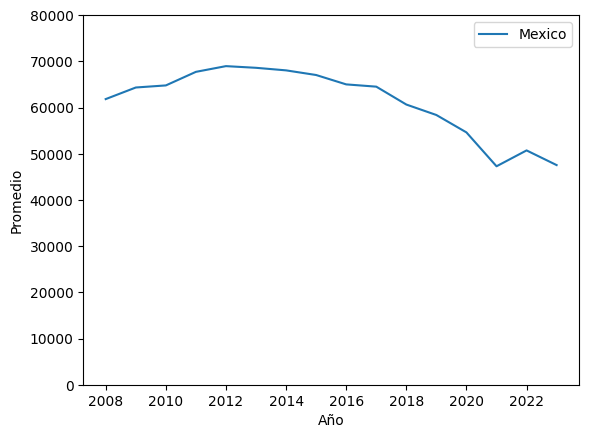

In [351]:
df_anio = df_anio[df_anio.index != '2024-01-01']
plt.plot(df_anio)
plt.legend(['Mexico'])
plt.ylim(0, 80000)
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()

## Reflexion





1.   El Estado de Mexico tiene muchos mas nacimientos que cualquier otro estado de la Republica Mexicana.
2.   Jalisco y la Cuidad de Mexico tiene numero de nacimientos parecidos.
3. La Cuidad de Mexico se vio rebasada en nacimientos por Jalisco, por lo que probablemente pronto Jalisco se pueda situar como la segunda entidad con mayor poblacion del pais (habria que ver lo que sucede con las defunciones).
4. El confinamiento no trajo un incremento en el numero de naciemientos, sino que tuvo un decremento pronunciado salvo un ligero pico en 2022.
5. Actualmente el promedio nacional de nacimientos tiene tendencia descendente, lo cual puede sugerir que a los jovenes no les interesa tener hijos.

